# 1.Setup 

## 1.1 Instaling depedencies :  

In [2]:
!pip install tensorflow

In [3]:
!pip list 

Package                       Version
----------------------------- --------------------
2captcha-python               1.1.2
absl-py                       1.4.0
aiohttp                       3.8.3
aiosignal                     1.2.0
alabaster                     0.7.12
altair                        4.2.0
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asgiref                       3.5.2
astroid                       2.11.7
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel 

s3transfer                    0.6.0
scikit-image                  0.19.3
scikit-learn                  1.0.2
scikit-learn-intelex          2021.20221004.171807
scipy                         1.7.3
Scrapy                        2.6.2
seaborn                       0.12.1
SecretStorage                 3.3.1
selenium                      4.3.0
semver                        2.13.0
Send2Trash                    1.8.0
sentencepiece                 0.1.96
service-identity              18.1.0
setuptools                    65.5.0
setuptools-git                1.2
sip                           6.6.2
six                           1.15.0
smart-open                    5.2.1
smmap                         5.0.0
sniffio                       1.2.0
snowballstemmer               2.2.0
sortedcollections             2.1.0
sortedcontainers              2.4.0
soupsieve                     2.3.2.post1
spacy                         3.4.1
spacy-legacy                  3.0.9
spacy-loggers                 1.0.3
Sp

In [4]:
!pip install opencv-python 

In [5]:
!pip install matplotlib 

## 1.2 importing Dependencies   : 

In [6]:
#importing depencies  : 
import cv2   
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import random 

In [7]:
#import tensorflow dependecies - Functional API 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer , Conv2D , Dense ,  MaxPooling2D , Input  , Flatten 
import tensorflow as tf  



2023-04-29 23:45:17.000527: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-29 23:45:17.062933: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-29 23:45:17.065217: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 23:45:17.874793: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
!pwd

/home/yassine/DLProject


## 1.3 Setup the paths for our data 

In [17]:
#setup paths  
PATH_POS = os.path.join( "data" , "positive")
PATH_NEGA = os.path.join( "data" , "negative")
PATH_ANC = os.path.join( "data" , "anchor")

# Collect the data 

## 1.1 Wild Data set 

In [18]:
# move the wild dataset to our negative repo 
for directory in os.listdir("./lfw"): 
    for file in os.listdir(os.path.join("./lfw", directory)):
        ex_path  = os.path.join("./lfw" , directory ,file)
        new_path = os.path.join(PATH_NEGA , file)
        os.replace(ex_path ,new_path)

In [15]:
!pwd

/home/yassine/DLProject


## Collect positive and anchor images  :

In [34]:
import  uuid
cap  = cv2.VideoCapture(0)
while cap.isOpened():
    ret , frame =  cap.read()
    #resizing the frame x<
    frame = frame[120:120+250 , 200:200+250, :]
    #  add to the anchor image 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        #create a unique name for the image
        imagepath = os.path.join(PATH_ANC , '{}.jpg'.format(uuid.uuid1())
        # add the image to the anchor file using opencv 
        cv2.imwrite(imagepath , frame)
    #  add to the positive image 
    if cv2.waitKey(1) & 0XFF == ord('p'):
        #create a unique name for the image
        imagepath = os.path.join(PATH_POS , '{}.jpg'.format(uuid.uuid1()))
        # add the image to the anchor file using opencv 
        cv2.imwrite(imagepath , frame)
        
    #show image 
    cv2.imshow("Me Image" , frame)
    #Break the Loop 
    if cv2.waitKey(2) & 0XFF == ord('q'):
        break 
#Release the webcam 
cap.release() 
#close the image show frame 
cv2.destroyAllWindows()
    
    

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread (0x6253450).
Cannot move to target thread (0x593daf0)

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread (0x6253450).
Cannot move to target thread (0x593daf0)

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread (0x6253450).
Cannot move to target thread (0x593daf0)

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread (0x6253450).
Cannot move to target thread (0x593daf0)

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread (0x6253450).
Cannot move to target thread (0x593daf0)

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread (0x6253450).
Cannot move to target thread (0x593daf0)

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread (0x6253450).
Cannot move to target thread (0x593daf0)

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread

# Load and Preprocess images 

## Get images directories  

In [39]:
anchor = tf.data.Dataset.list_files(PATH_ANC+"/*.jpg").take(300)
positive = tf.data.Dataset.list_files(PATH_POS+"/*.jpg").take(300)
negative = tf.data.Dataset.list_files(PATH_NEGA+"/*.jpg").take(300)

## Preprocessing  - scale and resize

In [48]:
def preprocessing(file_path): 
    #Read and load the data from the file 
    img  = tf.io.decode_jpeg(tf.io.read_file(file_path))
    #Resize the picture to 100X100px 
    img = tf.image.resize(img , (100,100))
    #scale the values of the images between 0-1
    img = img/255.0
    #return the image  
    return img

In [40]:
dir_test = anchor.as_numpy_iterator()

2023-04-30 02:13:51.119316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1255]
	 [[{{node Placeholder/_0}}]]
2023-04-30 02:13:51.120120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1255]
	 [[{{node Placeholder/_0}}]]


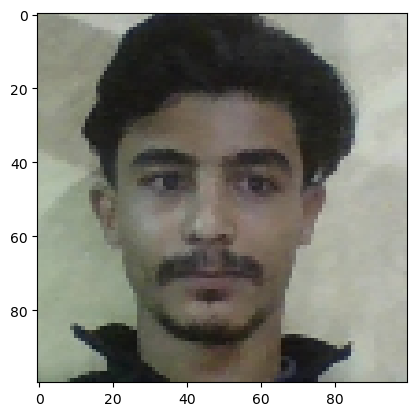

In [46]:
plt.imshow(preprocessing(dir_test.next()))

In [43]:
print(tf.io.decode_jpeg(tf.io.read_file(dir_test.next())))

tf.Tensor(
[[[141 143 132]
  [140 142 131]
  [139 140 132]
  ...
  [191 202 188]
  [192 203 187]
  [192 203 187]]

 [[139 141 128]
  [140 142 129]
  [139 141 130]
  ...
  [190 201 187]
  [192 203 189]
  [193 204 188]]

 [[140 142 128]
  [141 143 129]
  [141 143 130]
  ...
  [195 203 192]
  [193 201 190]
  [194 202 189]]

 ...

 [[147 156 135]
  [137 149 129]
  [138 149 133]
  ...
  [178 184 172]
  [178 184 172]
  [178 184 172]]

 [[142 151 132]
  [137 148 131]
  [132 143 129]
  ...
  [178 184 172]
  [176 184 171]
  [177 185 172]]

 [[140 149 130]
  [135 146 129]
  [132 143 129]
  ...
  [178 184 172]
  [176 184 171]
  [177 185 172]]], shape=(250, 250, 3), dtype=uint8)


## Preprocessing  - scale and resize

In [49]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [52]:
list(data.as_numpy_iterator())

[(b'data/anchor/4b375284-e6e9-11ed-a160-087190bf50b3.jpg',
  b'data/positive/12568ec6-e6e9-11ed-a160-087190bf50b3.jpg',
  1.0),
 (b'data/anchor/3e996210-e6e9-11ed-a160-087190bf50b3.jpg',
  b'data/positive/b602f786-e6e8-11ed-a160-087190bf50b3.jpg',
  1.0),
 (b'data/anchor/3da66fba-e6e9-11ed-a160-087190bf50b3.jpg',
  b'data/positive/f11678ca-e6e8-11ed-a160-087190bf50b3.jpg',
  1.0),
 (b'data/anchor/382a23ec-e6e9-11ed-a160-087190bf50b3.jpg',
  b'data/positive/f58102b8-e6e8-11ed-a160-087190bf50b3.jpg',
  1.0),
 (b'data/anchor/4d6a1244-e6e9-11ed-a160-087190bf50b3.jpg',
  b'data/positive/7b971442-e6e8-11ed-a160-087190bf50b3.jpg',
  1.0),
 (b'data/anchor/41ed6538-e6e9-11ed-a160-087190bf50b3.jpg',
  b'data/positive/8e254318-e6e8-11ed-a160-087190bf50b3.jpg',
  1.0),
 (b'data/anchor/5cd0172a-e6e8-11ed-a160-087190bf50b3.jpg',
  b'data/positive/ecb60c6e-e6e8-11ed-a160-087190bf50b3.jpg',
  1.0),
 (b'data/anchor/38b2bdd8-e6e9-11ed-a160-087190bf50b3.jpg',
  b'data/positive/efa98b58-e6e8-11ed-a160-087

In [53]:
data 

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [54]:
samples =  data.as_numpy_iterator()

In [55]:
samples.next()

(b'data/anchor/4769eb4e-e6e9-11ed-a160-087190bf50b3.jpg',
 b'data/positive/8bbfdb6a-e6e8-11ed-a160-087190bf50b3.jpg',
 1.0)

## Build a train and test partition 

In [60]:
def preprocess_twin(input_image , validation_image , label) :
    return (preprocessing(input_image) , preprocessing(validation_image) , label)

In [61]:
test = preprocess_twin(*(samples.next()))

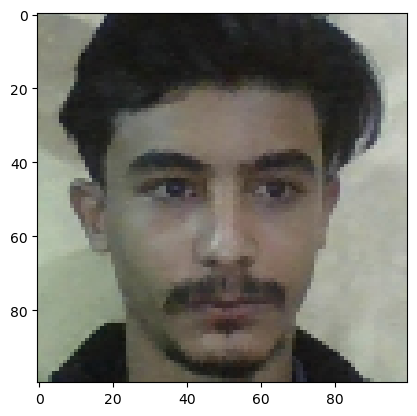

In [68]:
plt.imshow(test[0])

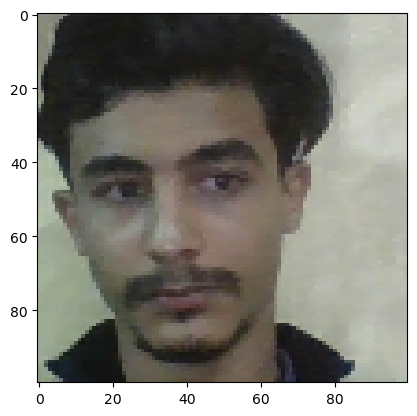

In [69]:
plt.imshow(test[1])

In [118]:
# build a dataloader pipeline 
#data = data.map(preprocess_twin)
#data = data.cache()
data = data.shuffle(buffer_size=1024)

In [119]:
data 

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [120]:
 samples = data.as_numpy_iterator()

2023-04-30 16:30:56.596086: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_39' with dtype float and shape [300]
	 [[{{node Placeholder/_39}}]]
2023-04-30 16:30:56.598163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_18' with dtype float and shape [300]
	 [[{{node Placeholder/_18}}]]


In [121]:
samples.next()

(array([[[0.5502451 , 0.55808824, 0.514951  ],
         [0.55784315, 0.5656863 , 0.52254903],
         [0.5514706 , 0.5593137 , 0.51029414],
         ...,
         [0.7588235 , 0.7705882 , 0.72745097],
         [0.76862746, 0.78039217, 0.7372549 ],
         [0.7727941 , 0.7862745 , 0.7379902 ]],
 
        [[0.5276961 , 0.5375    , 0.48553923],
         [0.54901963, 0.5588235 , 0.50686276],
         [0.5470588 , 0.5598039 , 0.5063726 ],
         ...,
         [0.75808823, 0.7678922 , 0.7372549 ],
         [0.7678922 , 0.77843136, 0.7512255 ],
         [0.7705882 , 0.78161764, 0.75416666]],
 
        [[0.52916664, 0.5448529 , 0.48995098],
         [0.51985294, 0.5355392 , 0.48063725],
         [0.52254903, 0.5367647 , 0.48259804],
         ...,
         [0.7490196 , 0.7529412 , 0.73333335],
         [0.76348037, 0.7703431 , 0.7507353 ],
         [0.76691175, 0.7747549 , 0.7610294 ]],
 
        ...,
 
        [[0.5210784 , 0.57598037, 0.47696078],
         [0.52867645, 0.58161765, 0.48382

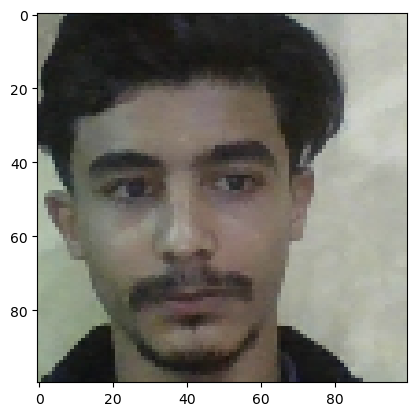

In [122]:
plt.imshow(samples.next()[0])

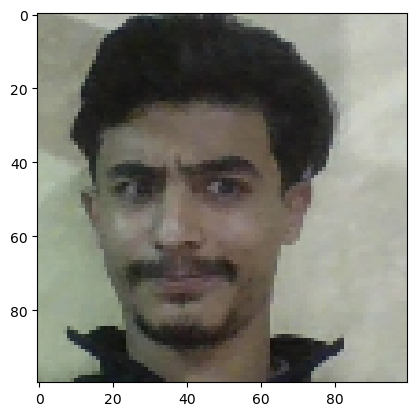

In [123]:
plt.imshow(samples.next()[1])

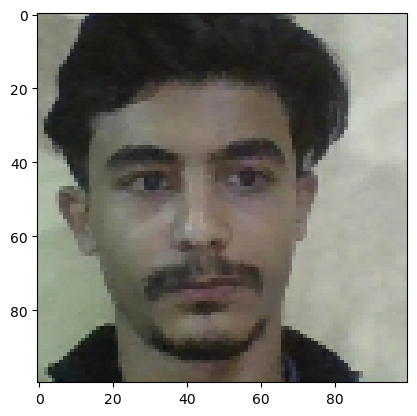

In [124]:
plt.imshow(samples.next()[0])

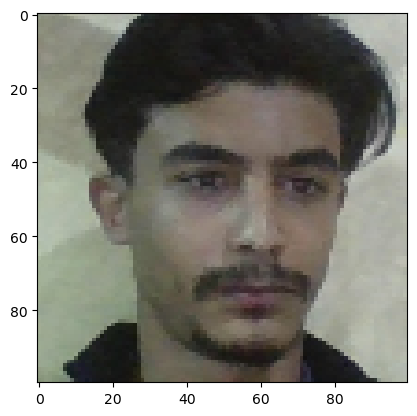

In [127]:
plt.imshow(samples.next()[0])

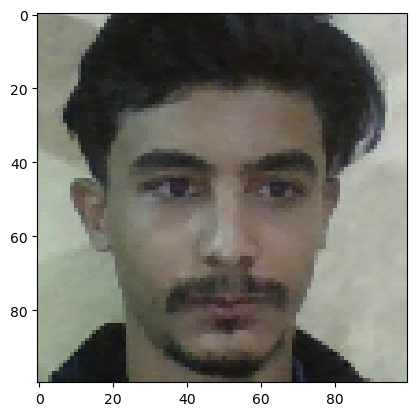

In [143]:
samp  = samples.next()
plt.imshow(samp[0])

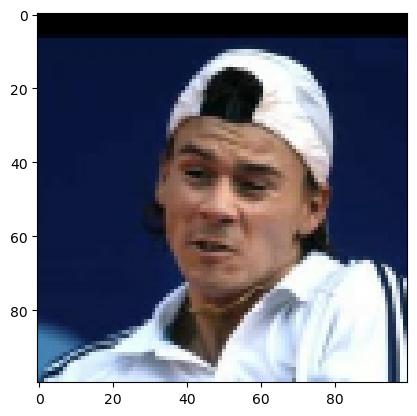

In [147]:
plt.imshow(samples.next()[1])

In [152]:
# traning partition 
train_data = data.take(round(len(data)*0.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [153]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [154]:
#Testing partition 
test_data = data.skip(round(len(data)*0.7))
test_data =  test_data.take(round(len(data)*0.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [156]:
inp = Input(shape= (100,100,3) , name = "input_image")


In [157]:
inp

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'input_image')>

# Model engineering 

In [161]:
# build embedding layer 

def make_embedding():
    inp = Input(shape=(100,100,3) , name = "input_image")
    c1 = Conv2D(64,(10,10) , activation = "relu")(inp)
    m1 = MaxPooling2D(64 , (2,2) , padding="same")(c1)
    
    c2 = Conv2D(128,(7,7) , activation = "relu")(m1)
    m2 = MaxPooling2D(64 , (2,2) , padding="same")(c2)
    
    c3 = Conv2D(128,(4,4) , activation = "relu")(m2)
    m3 = MaxPooling2D(64 , (2,2) , padding="same")(c3)
    
    c4 = Conv2D(256,(4,4) , activation = "relu")(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096 , activation = "sigmoid")(f1)
    



    
    return Model(inputs =[inp] , outputs=[d1]   ,name="embedding" )

In [167]:
embedding = make_embedding()

2023-04-30 21:57:34.357695: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150994944 exceeds 10% of free system memory.
2023-04-30 21:57:34.432917: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150994944 exceeds 10% of free system memory.


In [168]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

In [166]:
#Build distance layer 
class L1Dist(Layer):
    def __init__(self  ,**kwargs):
        super().__init__()
    #similariti calculation
    def call(self ,  input_embeddeing , validation_embedding):
        return tf.math.abs(input_embeddeing - validation_embedding )

In [173]:
# Make siamense model 
def make_siamense_model():
    #anchor image input 
    input_image = Input(name  = "input_img" , shape=(100,100,3))
    # validation image 
    validation_image  = Input(name = "validation_image" ,  shape = (100,100,3))
    #combine siamense distance conponents  
    siamense_layer =  L1Dist()
    siamense_layer._name= "distance"
    distances = siamense_layer(embedding(input_image), embedding(validation_image))
    
    #classification layer 
    classifier =  Dense(1 , activation = "sigmoid")(distances)
    
    return Model(inputs = [input_image , validation_image] , outputs = classifier , name = "SiamenseNetwork")
    
    
    
    
    

In [174]:
siamense_model = make_siamense_model()
siamense_model.summary()

Model: "SiamenseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_image (InputLayer)  [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_image[

# Training the Modul  


In [175]:
#setup the loss function and the optimizer : 
#setup the loss function
binary_cross_loss  =tf.losses.BinaryCrossentropy()

In [183]:
#setup the optimizer 
opt  = tf.keras.optimizers.Adam(1e-4)

In [184]:
#Establish a checkpoint
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamense_model=siamense_model)

In [185]:
# build train step function 
@tf.function 
def train_step(batch):
    with tf.GradientTape() as tape:
        #get the anchor & positive/negative image 
        X = batch[:2]
        #get the label 
        y  = batch[2]
        
        #forward pass 
        yhat =  siamense_model(X  , training = True )
        
        #loss 
        loss  = binary_cross_loss(y , yhat )
        
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamense_model.trainable_variables)

    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamense_model.trainable_variables))
        
    # Return loss
    return loss

In [186]:
#build a training loop  

def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)
    

In [188]:
EPOCHS = 50  
train(train_data , EPOCHS)


 Epoch 1/50
27/27 [==============================] - 481s 18s/step

 Epoch 2/50
27/27 [==============================] - 455s 17s/step

 Epoch 3/50
27/27 [==============================] - 452s 17s/step

 Epoch 4/50
27/27 [==============================] - 455s 17s/step

 Epoch 5/50
27/27 [==============================] - 452s 17s/step

 Epoch 6/50
27/27 [==============================] - 455s 17s/step

 Epoch 7/50
27/27 [==============================] - 452s 17s/step

 Epoch 8/50
27/27 [==============================] - 457s 17s/step

 Epoch 9/50
27/27 [==============================] - 452s 17s/step

 Epoch 10/50
27/27 [==============================] - 456s 17s/step

 Epoch 11/50
27/27 [==============================] - 450s 17s/step

 Epoch 12/50
27/27 [==============================] - 450s 17s/step

 Epoch 13/50
27/27 [==============================] - 447s 16s/step

 Epoch 14/50
27/27 [==============================] - 448s 17s/step

 Epoch 15/50
27/27 [======================

# Evaluate the model 

In [190]:
 #import metrics calculations 
from tensorflow.keras.metrics import Precision , Recall 

In [195]:
# Get the batch from the test data 
test_input, test_val, y_true = test_data.as_numpy_iterator().next()


In [196]:
# Make prediction  
yhat  =  siamense_model.predict([test_input ,test_val ])
yhat

1/1 [==============================] - 2s 2s/step


array([[9.9990189e-01],
       [4.1252058e-08],
       [8.0578189e-08],
       [5.1844629e-11],
       [1.1049792e-08],
       [1.0000000e+00],
       [4.5493824e-05],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999094e-01],
       [7.0629249e-06],
       [5.6073590e-10],
       [2.8317809e-06],
       [1.1463681e-11],
       [9.9999988e-01],
       [7.3862774e-12]], dtype=float32)

In [197]:
#post processing the results 
[1 if prediction > 0.5 else 0 for  prediction in yhat]

[1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]

In [198]:
m =  Recall()
m.update_state(y_true , yhat)
m.result().numpy()

1.0

In [199]:
m1 =  Precision()
m1.update_state(y_true , yhat)
m1.result().numpy()

1.0

In [201]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamense_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 0s 413ms/step
1.0 1.0


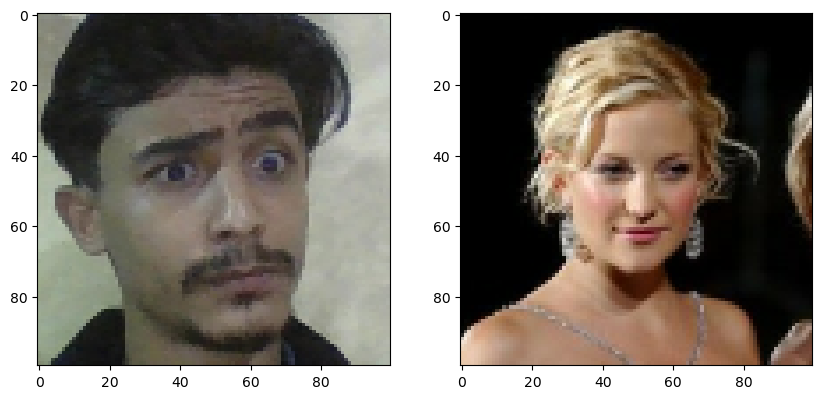

In [202]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

# Save Modul

In [203]:
# Save weights
siamense_model.save('siamensemodelv2.h5')


In [204]:
# Reload model 
model = tf.keras.models.load_model('siamensemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [205]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

1/1 [==============================] - 1s 519ms/step


array([[4.8172603e-07],
       [1.5169019e-11],
       [1.0000000e+00],
       [9.9999791e-01]], dtype=float32)

In [206]:
model.summary()

Model: "SiamenseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_image (InputLayer)  [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_image[

# Real Time Verification 

In [220]:
#verification function
def verify( model ,  detection_threshold ,  verification_threshold ):
    results = [] 
    for image in os.listdir(os.path.join("application_data", "verification_images")):
        input_img = preprocessing(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocessing(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified
        

In [221]:
# Real time verificaiton 

In [223]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
       

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(model, 0.5, 0.5)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread (0x6253450).
Cannot move to target thread (0x593daf0)

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread (0x6253450).
Cannot move to target thread (0x593daf0)

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread (0x6253450).
Cannot move to target thread (0x593daf0)

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread (0x6253450).
Cannot move to target thread (0x593daf0)

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread (0x6253450).
Cannot move to target thread (0x593daf0)

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread (0x6253450).
Cannot move to target thread (0x593daf0)

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread (0x6253450).
Cannot move to target thread (0x593daf0)

QObject::moveToThread: Current thread (0x593daf0) is not the object's thread

1/1 [==============================] - 0s 200ms/step
True


KeyboardInterrupt: 

In [224]:
# the above method return true because the same person for the verification 